In [2]:
import os
# from label_dataset import get_label
from generate_dataset import words_to_check
import spacy
import subprocess
import torch
import librosa
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import pickle
import spacy


In [5]:
spacy.require_gpu()
# subprocess.run('python -m spacy download en_core_web_sm', shell=True, check=True)
nlp = spacy.load("en_core_web_sm")

In [26]:
def get_label(sentence: str, word_count: dict, nlp, stress: dict)-> int: 
    doc = nlp(sentence)
    for token in doc:
        if token.text in words_to_check:
            if token.pos_ in ('VERB'):
                word_count[token.text] = (word_count[token.text][0] + 1, word_count[token.text][1], word_count[token.text][2])
                stress["FS"] += 1
            elif token.pos_ in ('NOUN', 'PROPN'):
                word_count[token.text] = (word_count[token.text][0], word_count[token.text][1] + 1, word_count[token.text][2])
                stress["IS"] += 1
            elif token.pos_ in ('ADJ'):
                word_count[token.text] = (word_count[token.text][0], word_count[token.text][1], word_count[token.text][2] + 1)
                stress["IS"] += 1
            else:
                print(f'type: {token.pos_}, word: {token.text}')


In [18]:
def clear_line(line):
    na_index = line.find("<NA>") + len("<NA> ")
    new_line = line[na_index:]
    return new_line

In [38]:
stm_dir_path = "/app/new_datasets/TEDLIUM/TEDLIUM_release-3/legacy/train/stm"
word_count = {word: (0, 0, 0) for word in words_to_check}
stress = {"IS": 0, "FS": 0}
# Collect relevant trans.txt content
for i, text_file_path in enumerate(os.listdir(stm_dir_path)):
    print(f"file: {i}")
    with open(f"{stm_dir_path}/{text_file_path}", "r") as trans_file:
        # Add relevant lines to new_trans_file
        for i, line in enumerate (trans_file):
            # print(f'line number: {i}')
            line = clear_line(line)  
            get_label(line, word_count, nlp, stress)
        print(f"IS: {stress['IS']}, FS: {stress['FS']}")


file: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 0, FS: 0
IS: 1, FS: 0
IS: 1, FS: 0
IS: 1, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 2, FS: 0
IS: 

KeyboardInterrupt: 

In [31]:
for key, value in word_count.items():
    print(f"word: {key}: verb:{value[0]} noun:{value[1]} adjective:{value[2]}")

print(f"FS={stress['FS']}, IS={stress['IS']}")

word: present: verb:0 noun:0 adjective:1
word: presents: verb:0 noun:0 adjective:0
word: PRESENT: verb:0 noun:0 adjective:0
word: PRESENTS: verb:0 noun:0 adjective:0
word: record: verb:0 noun:0 adjective:0
word: records: verb:0 noun:0 adjective:0
word: RECORD: verb:0 noun:0 adjective:0
word: RECORDS: verb:0 noun:0 adjective:0
word: conduct: verb:0 noun:0 adjective:0
word: conducts: verb:0 noun:0 adjective:0
word: CONDUCT: verb:0 noun:0 adjective:0
word: CONDUCTS: verb:0 noun:0 adjective:0
word: permit: verb:0 noun:0 adjective:0
word: permits: verb:0 noun:0 adjective:0
word: PERMIT: verb:0 noun:0 adjective:0
word: PERMITS: verb:0 noun:0 adjective:0
word: conflict: verb:0 noun:0 adjective:0
word: conflicts: verb:0 noun:0 adjective:0
word: CONFLICT: verb:0 noun:0 adjective:0
word: CONFLICTS: verb:0 noun:0 adjective:0
word: content: verb:0 noun:0 adjective:0
word: contents: verb:0 noun:0 adjective:0
word: CONTENT: verb:0 noun:0 adjective:0
word: CONTENTS: verb:0 noun:0 adjective:0
word: in

In [10]:
ps = 0
ns = 0
for key, value in word_count.items():
    ps += (value[1] + value[2])
    ns += value[0]
print (f"ps:{ps} ns:{ns}")

ps:1160 ns:196


In [5]:
from label_dataset import read_textgrid_data

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
read_textgrid_data('/app/datasets/train_100_clean/19-227-0031/19-227-0031.TextGrid')


In [3]:
def get_time_stamps(TextGrid_path: str)-> tuple:
    sentence_time_stamps = read_textgrid_data(TextGrid_path)
    for segment in sentence_time_stamps:
        if segment[2] in words_to_check:
            return segment[0], segment[1]
    return -1, -1

In [9]:
path = '/app/datasets/train_100_clean/226-131533-0030/226-131533-0030.TextGrid'
get_time_stamps(path)

(1.53, 2.24)

In [ ]:
import spacy
spacy.require_gpu()
subprocess.run('python -m spacy download en_core_web_sm', shell=True, check=True)
nlp = spacy.load("en_core_web_sm")

In [7]:
def get_label(txt_path: str, nlp)-> int:
    if os.path.exists(txt_path):
        with open(txt_path, "r") as trans_file:
            for line in trans_file:
                doc = nlp(line)
                for token in doc:
                    if token.text in words_to_check:
                        if token.pos_ in ('VERB'):
                            #word_count[token.text] = (word_count[token.text][0] + 1, word_count[token.text][1], word_count[token.text][2])
                            return 1
                        elif token.pos_ in ('NOUN', 'ADJ', 'PROPN'):
                            #word_count[token.text] = (word_count[token.text][0], word_count[token.text][1] + 1, word_count[token.text][2])
                            return 0
                        else:
                            return -1
    return -1

In [9]:
get_label('/app/datasets/train_100_clean/8838-298546-0033/8838-298546-0033.txt', nlp)

0

In [37]:
def fix_embedding_size(emb: tuple, fix_size)->tuple:
    if emb.dim() != 3 or emb.size(0) != 1:
        raise ValueError("Input data must have shape (1, height, width).")

    # Convert new shape to match the expected input for interpolate
    new_height, new_width = fix_size[1], fix_size[2]
    
    # Perform the interpolation using torch.nn.functional.interpolate
    reshaped_data = F.interpolate(emb.unsqueeze(0), size=(new_height, new_width), mode='bicubic', align_corners=False).squeeze(0)
    
    return reshaped_data


In [42]:
def get_embedding_from_wav2vec2(dir_path: str, dir_name: str, processor, model)-> tuple:
    # Load the audio file
    audio_file = f'{dir_path}/{dir_name}.flac'
    audio, sample_rate = librosa.load(audio_file, sr=16000)

    start_time, end_time = get_time_stamps(f'{dir_path}/{dir_name}.TextGrid')
    strach = 0.28 # in [sec]
    end_time = end_time + strach if ((end_time+strach)*sample_rate <= len(audio))\
                                 else end_time
    
    # Process the full audio with the Wav2Vec2 processor
    inputs = processor(audio, sampling_rate=sample_rate, return_tensors="pt", padding=True)

    # Forward pass through the model
    with torch.no_grad():
        outputs = model(**inputs)

    # Extract the last hidden state
    last_hidden_state = outputs.last_hidden_state

    # Calculate the corresponding sample indices
    start_sample = int(start_time * sample_rate)
    end_sample = int(end_time * sample_rate)

    # Calculate the number of feature vectors per second
    input_length_in_sec = len(audio) / sample_rate
    num_vectors = last_hidden_state.shape[1]
    vectors_per_second = num_vectors / input_length_in_sec

    # Calculate the indices for the time window
    start_vector = int(start_time * vectors_per_second)
    end_vector = int(end_time * vectors_per_second)

    # Extract the embeddings for the time window
    embeddings_for_time_window = last_hidden_state[:, start_vector:end_vector, :]

    
    return embeddings_for_time_window

In [44]:
from transformers import Wav2Vec2Processor, Wav2Vec2Model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [45]:
emb = get_embedding_from_wav2vec2('/app/datasets/train_100_clean/19-227-0031', '19-227-0031', processor, model)

torch.Size([1, 34, 768])


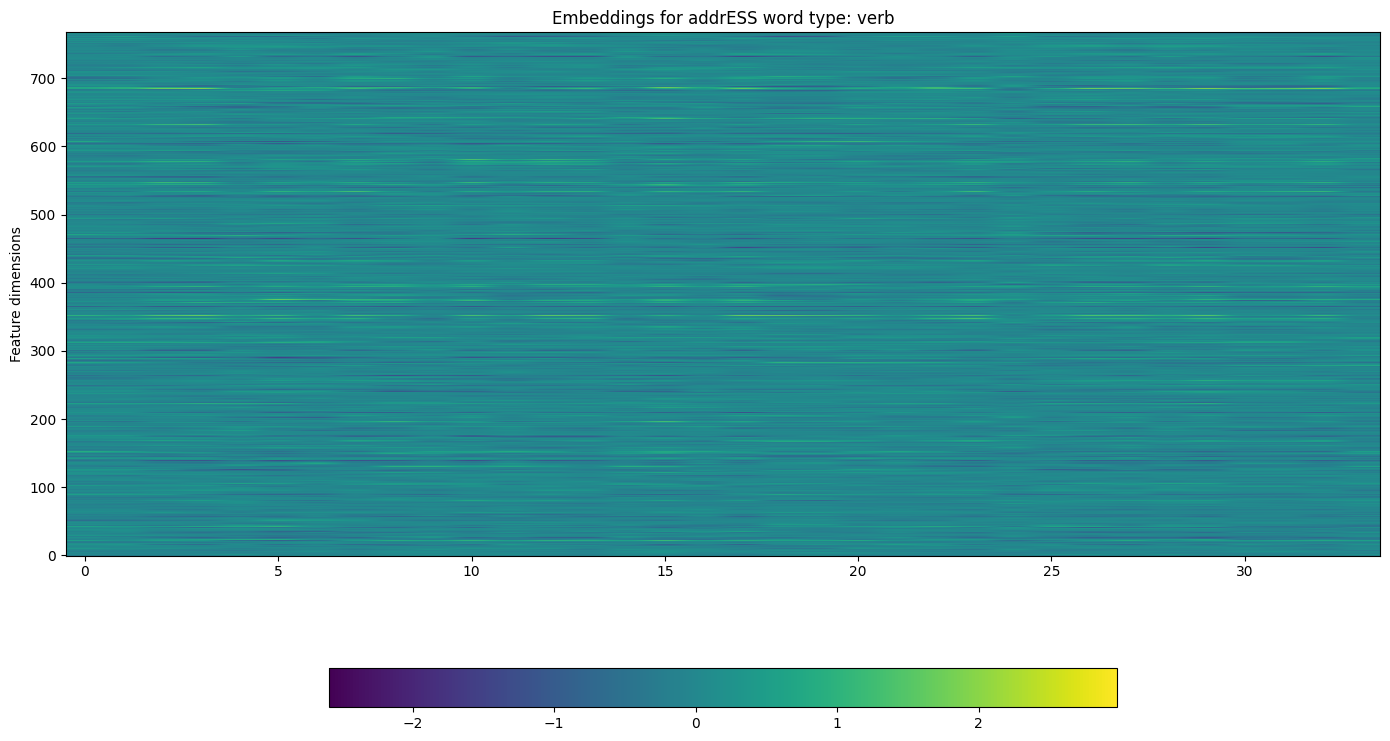

In [46]:
print(emb.shape)

def plot(em):
  fig, ax = plt.subplots(1,1, figsize=(14, 8))

  # Plot all embedding
  img = ax.imshow(em.squeeze().T, aspect='auto', origin='lower')
  ax.set_title(f"Embeddings for addrESS word type: verb")
  ax.set_ylabel("Feature dimensions")
  fig.colorbar(img, ax=ax, shrink=0.6, location="bottom")

  fig.tight_layout()
  plt.show()

# Plot the embeddings
plot(emb)

In [51]:
emb1 = fix_embedding_size(emb , ([1, 40, 768]))

In [18]:
subprocess.run("find ../datasets/train_100_clean -type f -name '*TextGrid' | wc -l", shell=True, check=True)

1376


CompletedProcess(args="find ../datasets/train_100_clean -type f -name '*TextGrid' | wc -l", returncode=0)

In [25]:
time_stamps = []

In [27]:
for dir_name in os.listdir("/app/datasets/train_100_clean"):
    if not dir_name.endswith(".txt"):
        time_stamps.append(get_time_stamps(f"/app/datasets/train_100_clean/{dir_name}/{dir_name}.TextGrid"))

In [30]:
curr_max = 0
for elem in time_stamps:
    if (elem[1] - elem[0]) >= curr_max:
        curr_max = (elem[1] - elem[0])
print(curr_max)

0.95


In [40]:
with open('/app/tagged_embeddings.pkl', 'rb') as file:
    tagged = pickle.load(file)

with open('/app/tagged_fixed_embeddings.pkl', 'rb') as file:
    taggedf = pickle.load(file) 

In [5]:
import random
with open('/app/datasets/tagged_embeddings.pkl', 'rb') as file:
    tagged = pickle.load(file)

with open('/app/datasets/tagged_fixed_embeddings.pkl', 'rb') as file:
    tagged_fixed = pickle.load(file) 

In [24]:
random.seed(42)
list_ones = [item for item in tagged if item[1] == 1]
list_zeros = [item for item in tagged if item[1] == 0]
list_ones_fixed = [item for item in tagged_fixed if item[1] == 1]
list_zeros_fixed = [item for item in tagged_fixed if item[1] == 0]

random_ones = random.sample(list_ones, min(196, len(list_ones)))
random_zeros = random.sample(list_zeros, min(200, len(list_zeros)))
random_ones_fixed = random.sample(list_ones_fixed, min(196, len(list_ones)))
random_zeros_fixed = random.sample(list_zeros_fixed, min(200, len(list_zeros)))

combined = random_ones + random_zeros
random.shuffle(combined)
combined_fixed = random_ones_fixed + random_zeros_fixed
random.shuffle(combined_fixed)

In [30]:
with open('/app/datasets/balanced_tagged_fixed_embeddings.pkl', 'rb') as file:
    balanced_fixed_data = pickle.load(file)

In [50]:
print(balanced_fixed_data[0][0].shape)
for j, i in enumerate(balanced_fixed_data):
    print(i[0].shape)
    array = i[0]
    if isinstance(array, np.ndarray) and array.shape == torch.Size(1, 57, 768):
        pass
        # features.append(array.flatten())
    else:
        print(f"Unexpected shape or type: {type(array)}, shape: {array.shape}")

torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([1, 57, 768])
Unexpected shape or type: <class 'torch.Tensor'>, shape: torch.Size([1, 57, 768])
torch.Size([

In [51]:
features = [item[0].numpy().flatten() for item in balanced_fixed_data] 